In [31]:
import torch

print(f"torch version {torch.__version__}")

torch version 2.1.0


In [32]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from torch import nn

In [33]:
n = 400

X = 10*torch.rand([n,2]) - 5.0
w0 = torch.tensor([[2.0], [-3.0]])
b0 = torch.tensor([[10.0]])
Y = X@w0 + b0 + torch.normal(0.0, 2.0, size = [n,1])
# print(f"X = {X}")
print(f"w0 = {w0}")
print(f"b0 = {b0}")
print(f"w0 shape = {w0.shape}")
print(f"Y shape = {Y.shape}")
print(f"X shape = {X.shape}")

w0 = tensor([[ 2.],
        [-3.]])
b0 = tensor([[10.]])
w0 shape = torch.Size([2, 1])
Y shape = torch.Size([400, 1])
X shape = torch.Size([400, 2])


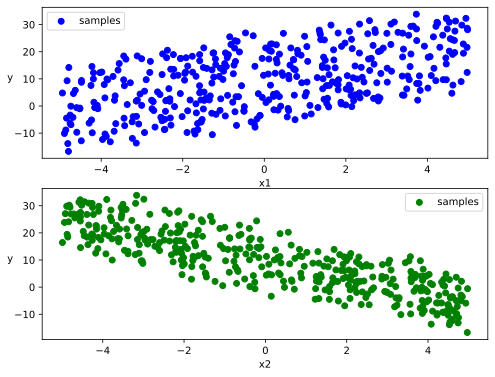

In [34]:
# 数据可视化

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize = (8,6))
ax1 = plt.subplot(2,1,1)
ax1.scatter(X[:,0].numpy(),Y[:,0].numpy(), c = "b",label = "samples")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(2,1,2)
ax2.scatter(X[:,1].numpy(),Y[:,0].numpy(), c = "g",label = "samples")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)
plt.show()


In [35]:
def data_iter(data, labels, batch_size=8):
    data_len = len(data)
    indices = list(range(data_len))
    np.random.shuffle(indices)
    for i in range(0, data_len, batch_size):
        # print(f"第{i}个batch")
        # 确定本次batch选择的
        indexs = torch.LongTensor(indices[i:min(i + batch_size, data_len)])
        # print(indexs)
        # 利用 index_select API 获取本次batch所选择的data进行操作
        yield data.index_select(0, indexs), labels.index_select(0, indexs)

In [36]:
input_tensor = torch.tensor([[1, 2, 3],
                             [4, 5, 6],
                             [7, 8, 9]])

output_tensor = input_tensor.index_select(0,torch.tensor([0,1]))
print(f"output_tensor: {output_tensor}")

output_tensor: tensor([[1, 2, 3],
        [4, 5, 6]])


In [37]:
#test
batch_size = 8
(data, labels) = next(data_iter(X,Y,batch_size))
print(data)
print(labels)

tensor([[-0.1031,  4.8425],
        [ 0.5977,  0.9001],
        [-3.1400,  4.0772],
        [-1.9176, -3.7725],
        [ 0.7207,  0.2476],
        [ 2.5375, -3.5325],
        [ 1.4256, -1.0301],
        [ 1.4950, -2.1994]])
tensor([[ -3.4725],
        [ 11.2735],
        [-13.6540],
        [ 17.7890],
        [ 13.7069],
        [ 26.6140],
        [ 14.2186],
        [ 16.8608]])


In [38]:
class LinearRegression:

    def __init__(self):
        self.w = torch.randn_like(w0, requires_grad=True)
        self.b = torch.zeros_like(b0,requires_grad=True)

    def forward(self, x):
        return x@self.w + self.b
    
    def loss_fn(self, y_pred, y_true):
        return torch.mean((y_pred - y_true)**2/2)
    
model = LinearRegression()


In [44]:
def train_step(model, data, labels):

    pred = model.forward(data)
    # print(f"pred:{pred}")
    loss = model.loss_fn(pred, labels)
    # print(f"loss:{loss}") 
    loss.backward()
    # print(model.w.grad, model.b.grad)
    # with torch.no_grad():
    #     # 梯度下降法更新参数
    #     model.w -= 0.001*model.w.grad
    #     model.b -= 0.001*model.b.grad

    #     # 梯度清零
    #     model.w.grad.zero_()
    #     model.b.grad.zero_()

    model.w.data = model.w.data - 0.001*model.w.grad.data
    model.b.data = model.b.data - 0.001*model.b.grad.data

    model.w.grad.data = torch.zeros_like(model.w.data)
    model.b.grad.data = torch.zeros_like(model.b.data)
    return loss

In [40]:
batch_size = 10
(features,labels) = next(data_iter(X,Y,batch_size))
train_step(model,features,labels)

tensor(108.2897, grad_fn=<MeanBackward0>)

In [41]:
def train_model(model, epochs):
    for epoch in range(1, epochs):
        for data, labels in data_iter(X,Y,10):
            loss = train_step(model, data, labels)

        if epoch%10==0:
            print("epoch =",epoch,"loss = ",loss.item())
            print("model.w =",model.w.data)
            print("model.b =",model.b.data)

train_model(model, epochs=50)

epoch = 10 loss =  23.27692985534668
model.w = tensor([[ 1.9568],
        [-2.8557]])
model.b = tensor([[3.2399]])
epoch = 20 loss =  14.616777420043945
model.w = tensor([[ 2.0257],
        [-2.9621]])
model.b = tensor([[5.4250]])
epoch = 30 loss =  3.9997475147247314
model.w = tensor([[ 2.0244],
        [-2.9733]])
model.b = tensor([[6.8900]])
epoch = 40 loss =  4.5658745765686035
model.w = tensor([[ 2.0184],
        [-2.9875]])
model.b = tensor([[7.8720]])


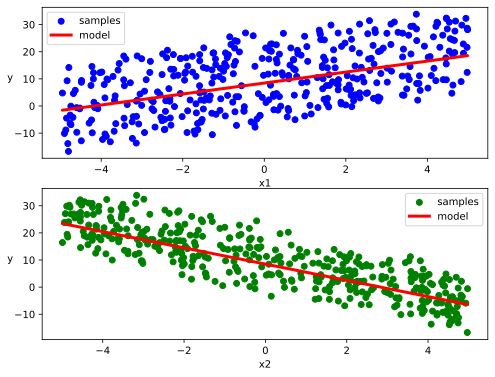

In [42]:
# 数据可视化

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize = (8,6))
ax1 = plt.subplot(2,1,1)
ax1.scatter(X[:,0].numpy(),Y[:,0].numpy(), c = "b",label = "samples")
ax1.plot(X[:,0].numpy(),(model.w[0].data * X[:,0]+model.b[0].data).numpy(), "-r",linewidth = 3.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(2,1,2)
ax2.scatter(X[:,1].numpy(),Y[:,0].numpy(), c = "g",label = "samples")
ax2.plot(X[:,1].numpy(),(model.w[1].data * X[:,1]+model.b[0].data).numpy(), "-r",linewidth = 3.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)
plt.show()
